# **Titanic Competition**

## **Informazioni**

**Informazioni Generali sul dataset**:

- `Survived` (`0`, `1`): Sopravvivenza (1 se la persona è sopravvissuta, 0 altrimenti);
- `Pclass` (`1`, `2`, `3`): Classe di alloggio (1°, 2° o 3° classe);
- `Sex` (`'male'`, `'female'`): Genere della persona;
- `Age`: Età (*in anni*) della persona;
- `SibSp`: Numero di fratelli oppure se sposa/marito a bordo;
- `Parch`: Numero di genitori e/o figli a bordo;
- `Ticket`: Numero identificativo del biglietto;
- `Fare`: Prezzo del biglietto;
- `Cabin`: Numero di cabina;
- `Embarked` (`C`, `Q`, `S`): Città di imbarco (Cherbourg, Queenstown, Southampton).

**Obiettivo**: Predirre se le persone elencate nel dataset di testing sono sopravvissute o meno.

## **Exploratory Data Analysis (EDA)**

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_theme()

In [4]:
# importare dataset di training
train_df = pd.read_csv(filepath_or_buffer='train.csv')

# preview del dataset di training
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
# vedere informazioni del dataset (tipo di variabili, presenza di valori nulli, ...)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### **Variabile `'PassengerId'`**

La variabile **'PassengerId'** rappresenta semplicemente un indice per ordinare i passeggeri.

Non sembra esserci correlazione con altre variabili.

### **Variabile `'Pclass'`**

La variabile **'Pclass'** rappresenta la classe di alloggio del passeggero (1°, 2° o 3° classe, rispettivamente dalla migliore alla peggiore).

Questa variabile può essere fonte di diversi spunti per il nostro obiettivo.

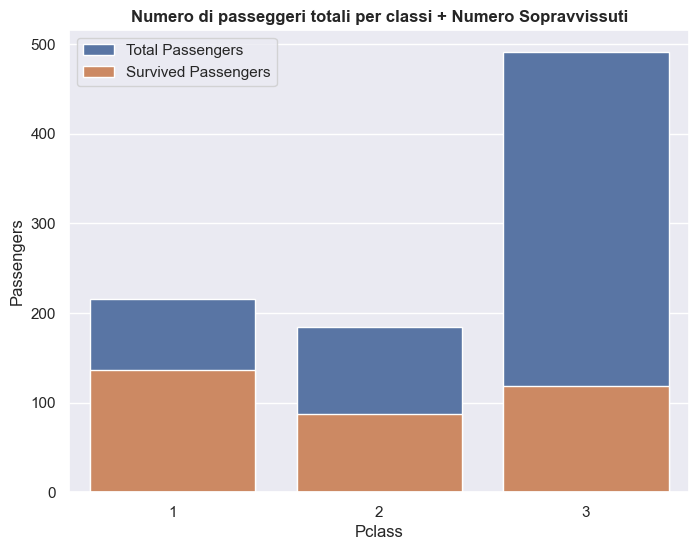

,Passengers,Survived,%_Sopravvivenza
Pclass,,,
1,216,136,0.629630
2,184,87,0.472826
3,491,119,0.242363


In [104]:
# estrapolare la colonna 'Pclass' dal dataset
pclass_train = train_df['Pclass']

# .value_counts() per identificare quanti valori appartengono a ciascuna classe
pclass_value_count = pclass_train.value_counts().sort_index()

# 'Pclass' groupby (sum)
pclass_sum_groupby = train_df.groupby(by=['Pclass']).sum(numeric_only=True)

# Trovare il numero di passengeri per classe
pclass_sum_groupby['Passengers'] = pclass_value_count

# Trovare la percentuale di sopravvivenza per classe
pclass_sum_groupby['%_Sopravvivenza'] = train_df.groupby(by=['Pclass']).mean(numeric_only=True)['Survived']

# grafico per mostrare la distribuzione dei valori

# inizializzare figura
plt.figure(figsize=(8,6))

# barplot passeggeri totali
barplot_total = sns.barplot(data=pclass_sum_groupby, x=pclass_sum_groupby.index, y='Passengers', label='Total Passengers')

# barplot passeggeri sopravvissuti
barplot_survived = sns.barplot(data=pclass_sum_groupby, x=pclass_sum_groupby.index, y='Survived', label='Survived Passengers')

# titolo, legenda e .show()
plt.title('Numero di passeggeri totali per classi + Numero Sopravvissuti', weight='bold')
plt.legend()
plt.show()


print('\n==============================================\n')
display(pclass_sum_groupby[['Passengers', 'Survived', '%_Sopravvivenza']])

### **Variabile `'Name'`**

In [67]:
name_split_1 = [x.split(',')[1] for x in train_df['Name']]
name_split_2 = [x.split('.')[0] for x in name_split_1]

name_split_2_final = [x.replace(' ', '') for x in name_split_2]

train_df['Name_title'] = name_split_2_final

train_df['Name_title'].value_counts()

Name_title
Mr             517
Miss           182
Mrs            125
Master          40
Dr               7
Rev              6
Mlle             2
Major            2
Col              2
theCountess      1
Capt             1
Ms               1
Sir              1
Lady             1
Mme              1
Don              1
Jonkheer         1
Name: count, dtype: int64

In [68]:
train_df.groupby(by=['Name_title']).mean(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Name_title,,,,,,,
Capt,746.000000,0.000000,1.000000,70.000000,1.000000,1.000000,71.000000
Col,671.500000,0.500000,1.000000,58.000000,0.000000,0.000000,31.025000
Don,31.000000,0.000000,1.000000,40.000000,0.000000,0.000000,27.720800
Dr,545.857143,0.428571,1.285714,42.000000,0.571429,0.000000,49.168457
Jonkheer,823.000000,0.000000,1.000000,38.000000,0.000000,0.000000,0.000000
Lady,557.000000,1.000000,1.000000,48.000000,1.000000,0.000000,39.600000
Major,493.500000,0.500000,1.000000,48.500000,0.000000,0.000000,28.525000
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,34.703125
Miss,408.884615,0.697802,2.307692,21.773973,0.714286,0.549451,43.797873


In [72]:
train_df.groupby(by=['Pclass', 'Name_title']).sum(numeric_only=True)

PassengerId  Survived      Age  SibSp  Parch       Fare
Pclass Name_title                                                          
1      Capt                 746         0    70.00      1      1    71.0000
       Col                 1343         1   116.00      0      0    62.0500
       Don                   31         0    40.00      0      0    27.7208
       Dr                  3104         3   175.00      4      0   319.6792
       Jonkheer             823         0    38.00      0      0     0.0000
       Lady                 557         1    48.00      1      0    39.6000
       Major                987         1    97.00      0      0    57.0500
       Master              1555         3    15.92      2      6   353.4083
       Miss               19614        44  1350.00     18     27  5722.5249
       Mlle                1353         2    48.00      0      0   118.8042
       Mme                  370         1    24.00      0      0    69.3000
       Mr                 47207        37  3617.50     30     27  7279.6792
       Mrs                20655        41  1390.00     33     16  3913.1667
       Sir                  600         1    49.00      1      0    56.9292
       theCountess          760         1    33.00      0      0    86.5000
2      Dr                   717         0    77.00      0      0    24.5000
       Master              4172         9    20.33      8     11   245.7542
       Miss               14904        32   716.50      9     19   693.3875
       Mr                 40577         8  2687.00     28     12  1751.9833
       Mrs                18328        37  1381.00     28     27   963.3417
       Ms                   444         1    28.00      0      0    13.0000
       Rev                 2914         0   259.00      1      1   109.8750
3      Master             10872        11   128.42     82     38   788.9625
       Miss               39899        51  1112.50    103     54  1555.3004
       Mr                147192        36  6578.00     91     40  3604.6240
       Mrs                17662        21  1106.00     26     61   765.8082

## **Machine Learning**

In [30]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [36]:
pd.get_dummies(data=train_df, columns=['Sex'], dtype=int)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,S,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,S,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,S,1,0
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,C,0,1


In [31]:
pd.factorize(train_df['Embarked'])

(array([ 0,  1,  0,  0,  0,  2,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  2,
         0,  0,  1,  0,  0,  2,  0,  0,  0,  1,  0,  2,  0,  1,  1,  2,  0,
         1,  0,  1,  0,  0,  1,  0,  0,  1,  1,  2,  0,  2,  2,  1,  0,  0,
         0,  1,  0,  1,  0,  0,  1,  0,  0,  1, -1,  0,  0,  1,  1,  0,  0,
         0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  2,  0,  1,  0,  0,  1,  0,  2,  0,  1,
         0,  0,  0,  1,  0,  0,  1,  2,  0,  1,  0,  1,  0,  0,  0,  0,  1,
         0,  0,  0,  1,  1,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  2,  0,  0,  1,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0,  0,  2,
         0,  2,  0,  0,  0,  0,  0,  1,  1,  2,  0,  2,  0,  0,  0,  0,  1,
         0,  0,  0,  1,  2,  1,  0,  0,  0,  0,  2,  1,  0,  0,  1,  0,  0,
         0, 